In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from random import random
from xml.parsers.expat import model
import pandas as pd 
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import numpy as np
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer

In [3]:
df= pd.read_csv("data.csv")

In [4]:
df.head()

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10017 entries, 0 to 10016
Data columns (total 4 columns):
Sl no         10017 non-null int64
Tweets        10017 non-null object
Search key    10017 non-null object
Feeling       10017 non-null object
dtypes: int64(1), object(3)
memory usage: 313.2+ KB


In [7]:
df['Feeling'].value_counts()

happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: Feeling, dtype: int64

In [6]:
Tweet = []
Labels = []

for row in df["Tweets"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Tweet.append(lemma_list)

In [8]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Feeling']= label_encoder.fit_transform(df['Feeling'])

df['Feeling'].unique()


array([3, 4, 0, 2, 1, 5], dtype=int64)

In [9]:
df['message']=df['Tweets']

#df = df[0:2000]
X = df['message']
y = df['Feeling']

In [10]:
# Extract Feature With CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test )
val1 = accuracy_score(y_pred,y_test)

rf_prec = precision_score(y_pred,y_test,average='micro')
rf_rec = recall_score(y_pred,y_test,average='micro')
rf_f1 = f1_score(y_pred,y_test,average='micro')

# SVM

In [14]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test )
val2 = accuracy_score(y_pred,y_test)

svm_prec = precision_score(y_pred,y_test,average='micro')
svm_rec = recall_score(y_pred,y_test,average='micro')
svm_f1 = f1_score(y_pred,y_test,average='micro')

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
X1 = X_train.toarray()
X2 = X_test.toarray()
clf.fit(X1,y_train)
y_pred = clf.predict(X2 )
val3 = accuracy_score(y_pred,y_test)

nb_prec = precision_score(y_pred,y_test,average='micro')
nb_rec = recall_score(y_pred,y_test,average='micro')
nb_f1 = f1_score(y_pred,y_test,average='micro')

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test )
val4 = accuracy_score(y_pred,y_test)

dt_prec = precision_score(y_pred,y_test,average='micro')
dt_rec = recall_score(y_pred,y_test,average='micro')
dt_f1 = f1_score(y_pred,y_test,average='micro')

# GBM

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test )
val5 = accuracy_score(y_pred,y_test)

gbm_prec = precision_score(y_pred,y_test,average='micro')
gbm_rec = recall_score(y_pred,y_test,average='micro')
gbm_f1 = f1_score(y_pred,y_test,average='micro')

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test )
val6 = accuracy_score(y_pred,y_test)

lr_prec = precision_score(y_pred,y_test,average='micro')
lr_rec = recall_score(y_pred,y_test,average='micro')
lr_f1 = f1_score(y_pred,y_test,average='micro')

# Voting Classifier

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='hinge')
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')

from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
#clf2 = SGDClassifier(loss='log_loss')

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('sgd', calibrated_clf)], voting='soft')

eclf1.fit(X_train,y_train)
y_pred = eclf1.predict(X_test )
val7 = accuracy_score(y_pred,y_test)

vot_prec = precision_score(y_pred,y_test,average='micro')
vot_rec = recall_score(y_pred,y_test,average='micro')
vot_f1 = f1_score(y_pred,y_test,average='micro')

# Comparison

In [24]:
score = [val1,val2,val3,val4,val5,val6,val7]

In [25]:
score1 = [rf_prec,svm_prec,nb_prec,dt_prec,gbm_prec,lr_prec,vot_prec]

In [26]:
score2 = [rf_rec,svm_rec,nb_rec,dt_rec,gbm_rec,lr_rec,vot_rec]

In [27]:
score3 = [rf_f1,svm_f1,nb_f1,dt_f1,gbm_f1,lr_f1,vot_f1]

In [28]:
#make variabel for save the result and to show it
classifier = ('Random Forest','SVM','Naive Bayes','Decision Tree','GBM','Logistic Regression','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6]
[0.8972055888223552, 0.782435129740519, 0.6621756487025948, 0.908183632734531, 0.9001996007984032, 0.9131736526946108, 0.9201596806387226]


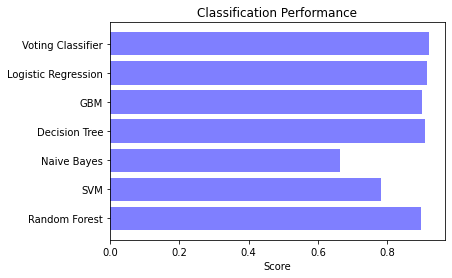

In [31]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

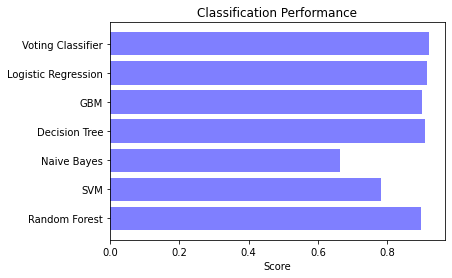

In [32]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

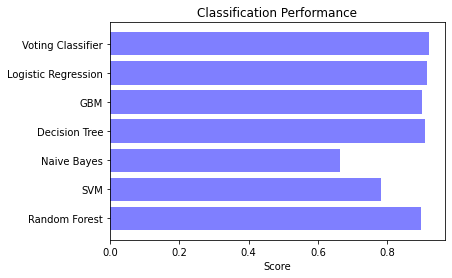

In [33]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score2, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

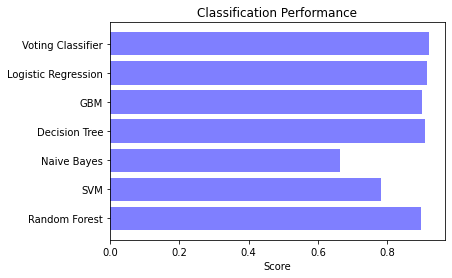

In [34]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score3, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [35]:
import joblib
filename = 'model_performance.sav'
joblib.dump(eclf1, filename)

['model_performance.sav']